<ipython-input-1-802b065fefa1>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace = True)
<ipython-input-1-802b065fefa1>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Retard"] = df["ArrDelay"] > 0


          ArrDelay  DepDelay    TaxiIn   TaxiOut    Retard
ArrDelay  1.000000  0.964421  0.115562  0.246300  0.256743
DepDelay  0.964421  1.000000  0.054489  0.073152  0.181587
TaxiIn    0.115562  0.054489  1.000000  0.073150  0.070073
TaxiOut   0.246300  0.073152  0.073150  1.000000  0.142826
Retard    0.256743  0.181587  0.070073  0.142826  1.000000


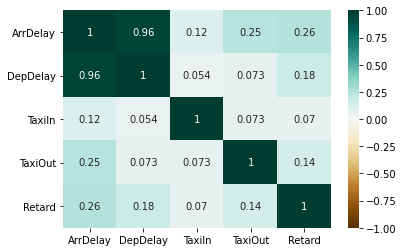

In [1]:
#Aquest exercici practicament cobreix totes les tecniques treballades fins ara, m´ha semblat un bon resum i consolidació
#de les mateixes
#Realitzo els següents exercicis seguits 
# Exercici 3
#Entrena’ls utilitzant els diferents paràmetres que admeten.
# Exercici 4
#Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.
# Exercici 5
#Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

#modul de carrega i de neteja de les dades, comú des de la primera pràctica


%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df2 = pd.read_csv("DelayedFlights.csv")
df2 = df2.loc[df2.loc[:,'Cancelled'] == 0]
df2 = df2.loc[df2.loc[:,'Diverted'] == 0]

#df1=df2[['DayOfWeek',  'UniqueCarrier','ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
#       'DepDelay', 'Origin','Dest', 'Distance', 'TaxiIn', 'TaxiOut']]
df1=df2[['ArrDelay','DepDelay','TaxiIn', 'TaxiOut']]

df1.dropna(inplace = True)

msk = np.random.rand(len(df1)) < 0.001

df = df1[msk]

df["Retard"] = df["ArrDelay"] > 0

# transform categorical to continuous
#factorizables_mapping = {}
#factorizable_names = ['UniqueCarrier', 'Origin', 'Dest']
#for fact_name in factorizable_names:
#    df[fact_name], factorizables_mapping[fact_name] = pd.factorize(df[fact_name])
corrMatrix = df.corr()
print (corrMatrix)
#Analitzem la matriu de correlació de les variables
sns.heatmap(corrMatrix, center=0, annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

In [2]:
#Llibreries necessaries
# dades
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráfiques
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesat y modelat
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

# Varis
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

In [3]:
# Configuracions matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuracions warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Aprofondim en l´estudi de les variables / distribuccions i correlacions

In [5]:
#Analitzem les distribucció de les dades de la variable ArrDelay

distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(df.ArrDelay, distributions=distribuciones)
fitter.fit()
print(fitter.summary(Nbest=10, plot=False))



          sumsquare_error           aic           bic  kl_div
cauchy           0.000075   2163.716710 -32942.321086     inf
beta             0.000093   5664.583053 -32513.804191     inf
logistic         0.000150   6492.594570 -31614.633830     inf
norm             0.000253  19007.609249 -30604.064623     inf
expon            0.000342   2923.625068 -30023.746582     inf
exponpow         0.000370   7028.829061 -29859.523652     inf
powerlaw         0.000510   1584.040094 -29240.691249     inf
gamma            0.000647  40267.717939 -28781.211794     inf
chi2             0.000656  42672.346026 -28756.543461     inf


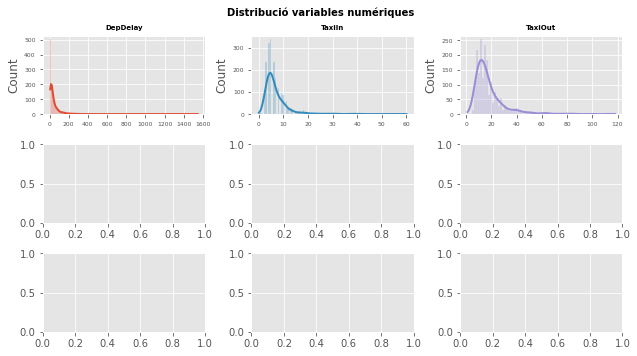

In [6]:
# ==============================================================================
# Estudi de la distribucions de les variables numeriques
# ==============================================================================

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució variables numériques', fontsize = 10, fontweight = "bold");

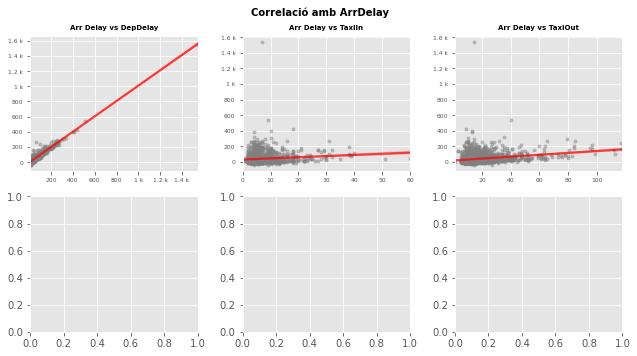

In [7]:
# Gráfico de correlació per cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrDelay'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Arr Delay vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlació amb ArrDelay', fontsize = 10, fontweight = "bold");

In [8]:
#Com s´ha vist en estudis previs, la variable amb més correlació amb ArrDelay és DepDelay i la segona TaxiOut, afegim 
#variables TaxiIn i Retard per veure com milloren les algoritmes

In [9]:
# Correlació entre columnes numériques
# ==============================================================================
#Correlació variables numériques
#Com s´ha estudiat alguns models (LM, GLM, ...) es veuen perjudicats si incorporen predictors altament correlacionats. 
# razón, es conveniente estudiar el grado de correlación entre las variables disponibles
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,ArrDelay,DepDelay,0.964421,0.964421
4,DepDelay,ArrDelay,0.964421,0.964421
3,ArrDelay,TaxiOut,0.246300,0.246300
12,TaxiOut,ArrDelay,0.246300,0.246300
2,ArrDelay,TaxiIn,0.115562,0.115562
8,TaxiIn,ArrDelay,0.115562,0.115562
7,DepDelay,TaxiOut,0.073152,0.073152
13,TaxiOut,DepDelay,0.073152,0.073152
11,TaxiIn,TaxiOut,0.073150,0.073150
14,TaxiOut,TaxiIn,0.073150,0.073150


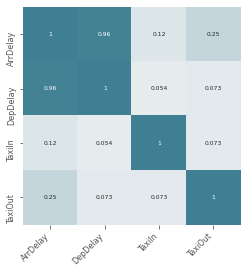

In [10]:
# Heatmap matriu de correlacions variables numeriques
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [11]:
# Repartim les dades en Train i test en base ArrDelay i les variables estudiades amb més bons resultats
# ==============================================================================


# Repartim les dades en Train i test en base ArrDelay
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('ArrDelay', axis = 'columns'),
                                        df['ArrDelay'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [12]:

from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#import multiprocessing

# Pipeline: preprocesat + model
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)                    
                    ],
                    remainder='passthrough'
                )

#Pasos de preprocessat i modelat al mateix pipelin
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Optimizació de hiperparámetres
# ==============================================================================
# Espai de busqueda de cada hiperparámetre
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
    
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

print(grid)
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['DepDelay',
                                                                                'TaxiIn',
                                                                                'TaxiOut'])])),
                                             ('modelo', Ridge())]),
                   n_iter=20, n_jobs=3,
                   param_distributions={'modelo__alpha': arr...
    

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
6,1.25951e-05,-11.353514,2.047411,-11.441774,0.574663


In [13]:
#Estudiant les dades amb regressió lineal i analitant MSE el millor hiperparametre alpha correspont a la sortida anterior

In [14]:
from sklearn.linear_model import Ridge

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )



preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Train
# ==============================================================================

_ = pipe.fit(X=X_train, y=y_train)
print(pipe)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['DepDelay', 'TaxiIn',
                                                   'TaxiOut'])])),
                ('modelo', Ridge())])


In [15]:
# Validació  creuada
# ==============================================================================
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validació  creuada: {cv_scores}")
print(f"Mitjana métricas de validació creuada: {cv_scores.mean()}")

Métricas validació  creuada: [-15.63112724  -9.23206897 -10.81892132 -10.15775502 -10.62527445]
Mitjana métricas de validació creuada: -11.29302940142931


In [16]:
# Validación cruzada repetida
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métriques de validació creuada: {cv_scores}")
print("")
print(f"Mitjana metriques de validació creuada: {cv_scores.mean()}")

Métriques de validació creuada: [ -9.85555316 -10.21305377 -11.55203124 -10.59588553 -14.83701775
  -8.95217464 -10.10254897 -10.80199008 -10.42942518 -16.03110296
 -11.15698824 -10.37804616 -15.04373829 -10.37796343 -10.04294237
  -9.92354905  -9.82590437 -11.42144905  -9.45517591 -15.78885508
  -9.36139107 -15.95694568 -10.0351073   -9.85513093 -11.16387836]

Mitjana metriques de validació creuada: -11.326313942037288


In [17]:
# Validació creuada repetida amb múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

#Convertim el diccionari a dataframe per facilitar la visualtizació
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.015955,0.010970,0.984603,0.948538,-9.990898,-12.163117
1,0.013963,0.007981,0.957350,0.970877,-11.206366,-11.636159
2,0.012951,0.007976,0.937445,0.976777,-13.245597,-10.471194
3,0.011968,0.007979,0.971230,0.966765,-8.954620,-12.537676
4,0.011967,0.006983,0.982407,0.951105,-10.700600,-11.845541
5,0.012968,0.006982,0.931460,0.979270,-14.204801,-9.815816
6,0.011967,0.006981,0.958364,0.970617,-10.923807,-11.740328
7,0.007979,0.004987,0.974646,0.958233,-13.306795,-10.484834
8,0.011969,0.006981,0.956733,0.970448,-10.173591,-12.064101
9,0.011968,0.007978,0.984972,0.947550,-9.939863,-12.198125


In [18]:
# Validació creuada repetida paralelitzada paralelizada (multicore)
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -11.20922023185162


In [19]:
predicciones = pipe.predict(X_test)

In [20]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'ArrDelay' : y_test, 'prediccion' : predicciones})
df_predicciones.head()

,ArrDelay,prediccion
47425,55.0,85.574566
808151,0.0,-14.889258
1688582,42.0,39.890408
1566118,19.0,21.030570
1432959,22.0,7.877124


In [21]:
# neg_root_mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print(rmse)

11.287556261907934


In [22]:
#Hiperparámetres (tuning)
#Escollir un conjunt de valors pel hiperparametres

#grid search: es fa una búsqueda exhaustiva sobre el conjunt de 
#valors previaments definits per usuari 

#random search: evaluen valors aletoris dins de limits definits per usuari

#Per cada valor (combinació si més un hiperparámetre), entrenar el model i estimar el seu error mitjançant
#un metode de validació 

#Finalment ajusta de nou el model, amb les dades dentranament i els millor hiperparametres trobats


In [23]:

#El modelo Ridge (model lineal) utilitzat fins ara té un hiperparametre anomenat alpha  
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Pipe: preprocesat + model
# ==============================================================================

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()


# Transformacions per les variables numeriques 
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)
                    ],
                    remainder='passthrough'
                )

pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Grid de hiperparametres
# ==============================================================================
param_grid = {'modelo__alpha': np.logspace(-5, 3, 10)}

# Búsqueda per validació creauada 
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        return_train_score = True
       )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)
print(grid)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['DepDelay',
                                                                          'TaxiIn',
                                                                          'TaxiOut'])])),
                                       ('modelo', Ridge())]),
             n_jobs=3,
             param_grid={'modelo__alpha': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.7825594

In [24]:
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
0,1e-05,-11.348105,2.114619,-11.439410,0.607549
1,7.74264e-05,-11.348105,2.114619,-11.439410,0.607549
2,0.000599484,-11.348105,2.114620,-11.439410,0.607549
3,0.00464159,-11.348107,2.114625,-11.439410,0.607549
4,0.0359381,-11.348126,2.114664,-11.439410,0.607549
5,0.278256,-11.348274,2.114965,-11.439420,0.607549
6,2.15443,-11.349940,2.117298,-11.440021,0.607540
7,16.681,-11.391286,2.136158,-11.473739,0.607153
8,129.155,-12.801908,2.545475,-12.896113,0.655697
9,1000,-28.730075,8.792242,-29.837163,2.693687


In [25]:
# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'modelo__alpha': 1e-05} : -11.348104810302495 neg_root_mean_squared_error


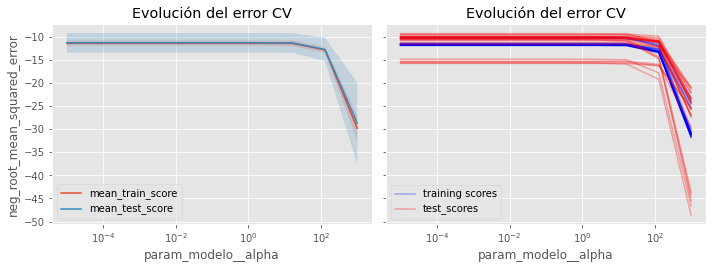

In [26]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.84), sharey=True)

# Gráfico 1
# ------------------------------------------------------------------------------
resultados.plot('param_modelo__alpha', 'mean_train_score', ax=axes[0])
resultados.plot('param_modelo__alpha', 'mean_test_score', ax=axes[0])
axes[0].fill_between(resultados.param_modelo__alpha.astype(np.float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
axes[0].fill_between(resultados.param_modelo__alpha.astype(np.float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
axes[0].legend()
axes[0].set_xscale('log')
axes[0].set_title('Evolución del error CV')
axes[0].set_ylabel('neg_root_mean_squared_error');

# Gráfico 2
# ------------------------------------------------------------------------------
numero_splits = grid.n_splits_

resultados.plot(
    x     = 'param_modelo__alpha',
    y     = [f'split{i}_train_score' for i in range(numero_splits)],
    alpha = 0.3,
    c     = 'blue', 
    ax    = axes[1]
)

resultados.plot(
    x     = 'param_modelo__alpha',
    y     = [f'split{i}_test_score' for i in range(numero_splits)],
    alpha = 0.3,
    c     = 'red', 
    ax    = axes[1]
)

axes[1].legend(
    (axes[1].get_children()[0], axes[1].get_children()[numero_splits]),
    ('training scores', 'test_scores')
)
axes[1].set_xscale('log')
axes[1].set_title('Evolución del error CV')
axes[1].set_ylabel('neg_root_mean_squared_error');

fig.tight_layout()

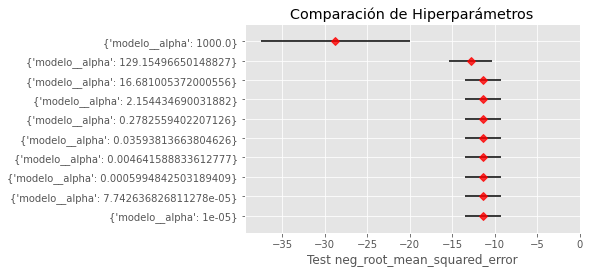

In [27]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_xlabel('Test neg_root_mean_squared_error');

In [28]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {'modelo__alpha': np.logspace(-5, 3, 100)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
5,1e-05,-11.349466,2.097023,-11.439545,0.606337


In [29]:
#optimitzacio Bayesiana
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

espacio_busqueda  = [Real(1e-6, 1e+3, "log-uniform", name='modelo__alpha')]

@use_named_args(espacio_busqueda)
def objective(**params):
    pipe.set_params(**params)
    return -np.mean(cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_root_mean_squared_error"))

resultados_opt = gp_minimize(
                    func         = objective,
                    dimensions   = espacio_busqueda,
                    n_calls      = 50,
                    random_state = 0
                )

print(f"Mejor score validación: {resultados_opt.fun}")
print(f"Mejores hiperparámetros: {list(zip([x.name for x in espacio_busqueda], resultados_opt.x))}")

Mejor score validación: 11.291851741940548
Mejores hiperparámetros: [('modelo__alpha', 1e-06)]


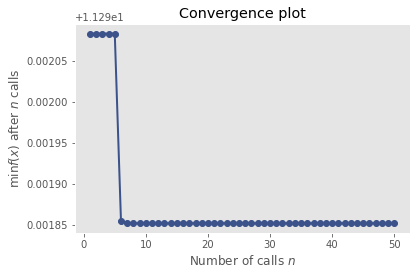

In [30]:
# Evolución de la optimización
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
plot_convergence(resultados_opt, ax = ax);

In [31]:
#Tuning del preprocesado
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector

# Pipe: preprocesado + modelo
# ==============================================================================
# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )


preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, make_column_selector(dtype_include=np.number))
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline(
        [('preprocessing', preprocessor),
        ('interactions', PolynomialFeatures(degree=2)),
        ('modelo', Ridge())])

# Grid de hiperparámetros
# ==============================================================================
param_grid = {'interactions': [PolynomialFeatures(degree=2), 'passthrough'],
              'modelo__alpha': np.logspace(-5, 3, 10)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

print(grid)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000015FB0D88FD0>)])),
                                       ('interactions', PolynomialFeatures()),
                                       ('modelo', Ridge())]),
             n_jobs=3,
             param_grid={'interactions': [PolynomialFeatures(), 'passthrough'],
                         'modelo__alpha': array([1.00000000e-05, 7.74263683e-05,

,param_interactions,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
10,passthrough,1e-05,-11.386078,1.777307,-11.446663,0.501011


In [32]:
#KNN
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )


preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', KNeighborsRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__n_neighbors': np.linspace(1, 100, 500, dtype=int)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

print(grid)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['DepDelay',
                                                                                'TaxiIn',
                                                                                'TaxiOut'])])),
                                             ('modelo',
                                              KNeighborsRegressor())]),
                   n_iter=20, n_jobs=3,
        

,param_modelo__n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
6,1,-25.796032,17.106756,-1.575663,0.209981


In [33]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_knn = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print(f"El error (rmse) de test es: {rmse_knn}")

El error (rmse) de test es: 17.680775410638727


In [34]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )


preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': ["auto", 3, 5, 7],
    'modelo__max_depth'   : [None, 3, 5, 10, 20]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)
print(grid)
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['DepDelay',
                                                                                'TaxiIn',
                                                                                'TaxiOut'])])),
                                             ('modelo',
                                              RandomForestRegressor())]),
                   n_iter=20, n_jobs=3,
      

,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
0,50,auto,20,-24.245188,21.178494,-11.14193,3.272508


In [35]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_rf = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_rf}")

El error (rmse) de test es: 13.244566527135747


In [36]:
#Gradient Boosting Trees
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )


preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', GradientBoostingRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': ["auto", 3, 5, 7],
    'modelo__max_depth'   : [None, 3, 5, 10, 20],
    'modelo__subsample'   : [0.5,0.7, 1]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)
print(grid)
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['DepDelay',
                                                                                'TaxiIn',
                                                                                'TaxiOut'])])),
                                             ('modelo',
                                              GradientBoostingRegressor())]),
                   n_iter=20, n_jobs=3,
  

,param_modelo__subsample,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
15,1,100,auto,3,-23.314853,22.081547,-9.50333,0.508211


In [37]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_gbm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_gbm}")

El error (rmse) de test es: 12.600508900470334


In [38]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

# Pipeline: preprocesado + modelos para el stacking
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),                 
                    ],
                    remainder='passthrough'
                )
# Se combinan los pasos de preprocesado y los modelos creando varios pipeline.
pipe_ridge = Pipeline([('preprocessing', preprocessor),
                     ('ridge', Ridge(alpha=3.4))])

pipe_rf = Pipeline([('preprocessing', preprocessor),
                     ('random_forest', RandomForestRegressor(
                                         n_estimators = 1000,
                                         max_features = 2,
                                         max_depth    = 20
                                        )
                     )])

In [40]:

estimators = [('ridge', pipe_ridge),
              ('random_forest', pipe_rf)]

stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = stacking_regressor.fit(X = X_train,y = y_train)

print(stacking_regressor)
# Error de test del stacking
# ==============================================================================
modelo_final = stacking_regressor
predicciones = modelo_final.predict(X = X_test)
rmse_stacking = mean_squared_error(
                    y_true  = y_test,
    
                    y_pred  = predicciones,
                    squared = False
                  )
print(f"El error (rmse) de test es: {rmse_stacking}")

StackingRegressor(estimators=[('ridge',
                               Pipeline(steps=[('preprocessing',
                                                ColumnTransformer(remainder='passthrough',
                                                                  transformers=[('numeric',
                                                                                 Pipeline(steps=[('scaler',
                                                                                                  StandardScaler())]),
                                                                                 ['DepDelay',
                                                                                  'TaxiIn',
                                                                                  'TaxiOut'])])),
                                               ('ridge', Ridge(alpha=3.4))])),
                              ('random_forest',
                               Pipeline(steps=[('preprocessing',
         

In [41]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)
print(grid)
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['DepDelay',
                                                                                'TaxiIn',
                                                                                'TaxiOut'])])),
                                             ('modelo', Ridge())]),
                   n_iter=20, n_jobs=3,
                   param_distributions={'modelo__alpha': arr...
    

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
6,1.25951e-05,-11.372715,1.932068,-11.443151,0.548034


In [42]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_lm}")

El error (rmse) de test es: 11.290495669590017


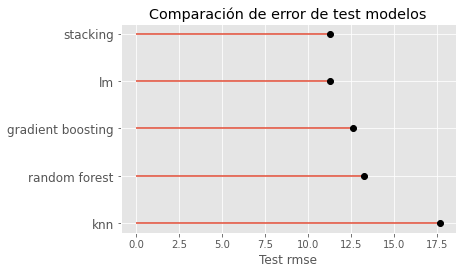

In [43]:
error_modelos = pd.DataFrame({
                        'modelo': ['knn', 'lm', 'random forest', 'gradient boosting',
                                   'stacking'],
                        'rmse': [rmse_knn, rmse_lm, rmse_rf, rmse_gbm, rmse_stacking]
                     })
#error_modelos = pd.DataFrame({
 #                       'modelo': ['knn', 'lm','random forest', 'gradient boosting'],
 #                       'rmse': [rmse_knn, rmse_lm, rmse_rf, rmse_gbm]
 #                    })


error_modelos = error_modelos.sort_values('rmse', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse)
ax.plot(error_modelos.rmse, error_modelos.modelo, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos'),
ax.set_xlabel('Test rmse');

In [44]:

# Error de test del modelo final
# ==============================================================================
from sklearn.metrics import mean_squared_error
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_lm}")

El error (rmse) de test es: 11.290495669590017
